# Project: Wrangling and Analyze Data

Wrangle & Analyze the WeRateDogs Twitter Archive

Ogunwale Oluremi Itunu

Udacity Project 2 

June 27th, 2022

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import requests
import os
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# load the enhanced twitter archive file into a DataFrame
df_archive =pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
folder_name = 'image_predictions.tsv'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
Url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(Url)
response

<Response [200]>

#### HTTP status code 200 indicates the request has succeeded¶

In [5]:
with open(os.path.join('image_predictions.tsv', Url.split('/')[-1]), mode ='wb') as file:
    file.write(response.content)

In [6]:
os.listdir('image_predictions.tsv')

['image-predictions.tsv']

In [7]:
# Read the TSV file into DataFrame
df_predictions = pd.read_csv("image_predictions.tsv/image-predictions.tsv",sep="\t")
df_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

I had issue accessing the twitter API so, i uploaded the text file uploaded by Udacity and converted it into a pandas series to create a new dataframe.

In [8]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [9]:

#read the txt file
with open('tweets-json.txt', 'r') as file:
    data = file.readlines()
   #create a df series 
tweet_id = []
retweet_count = []
favorite_count = []

for tweet in data:
    tweet_data =json.loads(tweet)
    tweet_id.append(tweet_data['id'])
    retweet_count.append(tweet_data['retweet_count'])
    favorite_count.append(tweet_data['favorite_count'])
    #new dataframe
tweet_json =pd.DataFrame({'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count})


In [10]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### In this section,I will be assessing these files in two ways, visually and programmatically.
#### Highlighting its quality and tidiness issues below putting in mind that we are more interested in the original tweets data.

### Quality issues
1.Non-decriptive columns headers in df_predictions (p1, p2, etc.)

2.The timestamp column is in string format, it's the wrong data type.

3.Some names in the name column have invalid strings like'an ','a ', which are probably not dogs' names

4.There are 745 tweets with the dog's name as " None " (Probably not worth looking at, because it's a large dataset and there are too many to verify.)

5.There 78 replies (in _ reply _ to _ status _ id, in _ reply _ to _ user _ id)

6.There are 181 retweets in the retweet columns, but we’re only interested in “original tweets”.

7.The source columns in df_archive are in URL.

8 Incorrect data in the df _ predictions table. (some images are not of a dog)



### Tidiness issues
1. Variables doggo, floofer, pupper and puppo form one variable.
2. df_archive and tweet_json form one observational unit


### Twitter Archive

In [11]:
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [12]:
#this methid will give us a statistcal description of our table
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
#this gives us a summary details of our data
#timestamp in a wrong data format
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1499,692187005137076224,NaN,NaN,2016-01-27 03:26:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a rare Arctic Wubberfloof. Unamused by...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692187005...,12,10,a,None,None,None,None


In [15]:
#checking for dupplicated values
sum(df_archive.duplicated())

0

In [16]:
df_archive.tail()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [17]:
#checking for the count of each values in the dataset
df_archive.rating_numerator.value_counts().head(10)

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
Name: rating_numerator, dtype: int64

In [18]:
#this shows that we have four major source categories for each tweets
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [22]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

#### it look like there is a large number of none/NAN values in the dog names categories.

In [23]:
#there are 745 none values in the name column and 55 invalid string as names
df_archive.name.value_counts().head()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Name: name, dtype: int64

In [24]:
#reading the name column
df_archive.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

##### It look like the dogs names are capitalized, so its safe to say names with lower cases are not dog names.¶

In [25]:
###list all names that are NOT capitalized
error_names_mask = df_archive.name.str.contains('^[a-z]', regex = True)
df_archive[error_names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

### Image_predictions

In [26]:

df_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [27]:
#non-descriptive columns headers
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".

In [28]:
df_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [29]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
df_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [31]:
df_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [32]:
df_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [33]:
##there are incoreect data. In particular, this link shows an ostrich instead of a dog.
df_predictions.iloc[424]

tweet_id                                 674063288070742018
jpg_url     https://pbs.twimg.com/media/CVrA-rIWEAANxwQ.jpg
img_num                                                   1
p1                                                  ostrich
p1_conf                                            0.661176
p1_dog                                                False
p2                                                 bearskin
p2_conf                                            0.214879
p2_dog                                                False
p3                                                     swab
p3_conf                                            0.064456
p3_dog                                                False
Name: 424, dtype: object

In [34]:
# wrong predictions: p1 classified it wrong and p3 classified in wrong
df_predictions.iloc[270]

tweet_id                                 670822709593571328
jpg_url     https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg
img_num                                                   1
p1                                                 web_site
p1_conf                                            0.993887
p1_dog                                                False
p2                                                Chihuahua
p2_conf                                            0.001252
p2_dog                                                 True
p3                                                     menu
p3_conf                                            0.000599
p3_dog                                                False
Name: 270, dtype: object

### Tweet_json

In [35]:
tweet_json.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [36]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [37]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [38]:
tweet_json.sample()

,tweet_id,retweet_count,favorite_count
1925,674051556661161984,530,1564


In [39]:
#display the no of unique values in each column
tweet_json.nunique()

tweet_id          2354
retweet_count     1724
favorite_count    2007
dtype: int64

In [40]:
#returns the turple of the dimensions of the dataframe
tweet_json.shape

(2354, 3)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [41]:
# Make copies of original pieces of data
df_archive_original = df_archive.copy()
df_predictions_original = df_predictions.copy()
tweet_json_original = tweet_json.copy()

### Issue #1: non-descriptive columns header in df _ predictions ( p 1, p 2, etc. )

#### Define:  
Fix the p1,p2,p3 etc column by renaming them to prediction_1 respectively

#### Code

In [42]:
#we want to rename the p1, p2 columns names etc to prediction_1 and prediction_2 respectively
df_predictions.rename(columns ={'p1':'prediction_1', 'p2':'prediction_2', 'p3':'prediction_3','p1_conf':'prediction_1_conf', 'p2_conf': 'prediction_2_conf', 'p3_conf':'prediction_3_conf', 'p1_dog':'prediction_1_dog', 'p2_dog':'prediction_2_dog', 'p3_dog':'prediction_3_dog'}, inplace =True)

#### Test

In [43]:
df_predictions.head()

,tweet_id,jpg_url,img_num,prediction_1,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #2: The timestamp column is in string format, it's the wrong data type.

#### Define: 
Convert timestamp to datetime data type

#### Code

In [44]:
df_archive['timestamp'] = pd.to_datetime(df_archive.timestamp)
df_archive['timestamp'] = df_archive.timestamp.dt.floor('s')

#### Test

In [45]:
df_archive.timestamp.head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

### Issue #3: Some names in the name column have invalid strings like'an ','a ', which are probably not dogs' names¶

#### Define:
Fix invalid strings and names in the name column to 'None".¶

##### It looks like the dog names are all capitalized, so words that begin in lowercase are probably not names, like "a", "the" and "an". Here's the list of these "names" again.

#### Code: 

In [46]:
df_archive.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [47]:
## list all names that are NOT capitalized
error_names_mask = df_archive.name.str.contains('^[a-z]', regex = True)
df_archive[error_names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [48]:
#Replace all lowercase words in the name column with the string "none".
df_archive.loc[error_names_mask, 'name'] = "None"

#### Test: 

In [49]:
#confirm
df_archive.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352        None
2353        None
2354        None
2355        None
Name: name, Length: 2356, dtype: object

### Issue #4: There are 745 tweets with the dog's name as " None "

#### Define: 
Convert all None values to NAN

#### Code:

In [50]:
#lets check the name column with value counts
df_archive.name.value_counts().head(10)

None       854
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Lola        10
Penny       10
Tucker      10
Bo           9
Winston      9
Name: name, dtype: int64

In [51]:
#change all None values to NAN
df_archive.name.replace(['None','none'], np.nan, inplace=True)

#### Test:

In [52]:
df_archive.name.value_counts().head()

Charlie    12
Lucy       11
Cooper     11
Oliver     11
Lola       10
Name: name, dtype: int64

In [53]:
df_archive.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351         NaN
2352         NaN
2353         NaN
2354         NaN
2355         NaN
Name: name, Length: 2356, dtype: object

### Issue#5: There are 78 replies (in _ reply _ to _ status _ id, in _ reply _ to _ user _ id)

#### Define: 
Delete both columns. They are not needed for our analysis

#### Code:

In [54]:
#Remove both columns as index base
df_archive.drop(df_archive.columns[[1, 2]], axis = 1, inplace = True)
  

#### Test:

In [55]:
df_archive

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,None,None,None,None


### Issue#6: There are 181 retweets in the retweet columns, but we’re only interested in “original tweets”.

#### Define:
Delete all retweet columns. 

#### Code:

In [56]:
df_archive.drop(df_archive.columns[[4, 5, 6]], axis = 1, inplace = True)
  

#### Test:

In [57]:
df_archive.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Issue#7: The source columns in df_archive are in URL.

#### Define: 
Change url to the specific four source categories in the source column .E.g 'twitter for iphone"

#### Code:

In [58]:
#change this list: 
sources_list = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
#to this list:
new_sources_list = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']

In [59]:
df_archive.source.replace(sources_list, new_sources_list, inplace=True)

#### Test:

In [60]:
df_archive.source.sample(5)

2088    Twitter for iPhone
1254    Twitter for iPhone
34      Twitter for iPhone
823     Twitter for iPhone
2344    Twitter for iPhone
Name: source, dtype: object

### Issue#8: Incorrect data in the df _ predictions table. (some images are not of a dog)

#### Define: 
Because this is a large dataset, it will be difficult to know which predictions url is acatually a dog unless we open each link one after the other. So, we won't clean this.

#### Code:

In [61]:
#this predicted an ostrich
df_predictions.iloc[424]

tweet_id                                          674063288070742018
jpg_url              https://pbs.twimg.com/media/CVrA-rIWEAANxwQ.jpg
img_num                                                            1
prediction_1                                                 ostrich
prediction_1_conf                                           0.661176
prediction_1_dog                                               False
prediction_2                                                bearskin
prediction_2_conf                                           0.214879
prediction_2_dog                                               False
prediction_3                                                    swab
prediction_3_conf                                           0.064456
prediction_3_dog                                               False
Name: 424, dtype: object

In [62]:
#wrong predictions: p1 classified it wrong and p3 classified in wrong
df_predictions.iloc[270]

tweet_id                                          670822709593571328
jpg_url              https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg
img_num                                                            1
prediction_1                                                web_site
prediction_1_conf                                           0.993887
prediction_1_dog                                               False
prediction_2                                               Chihuahua
prediction_2_conf                                           0.001252
prediction_2_dog                                                True
prediction_3                                                    menu
prediction_3_conf                                           0.000599
prediction_3_dog                                               False
Name: 270, dtype: object

As we can see, one tweet has an ostrich on a picture and it was correctly classified as "not dog breed" while the next picture has dog on it. We can see that p1_dog and p3_dog misclassified, i.e. it is not a dog breed, while p2_dog correctly classified this picture. However, we cannot confirm this information unless we open each picture, which is not possible due to a big volume of data.

### Additional Quality issues

#### Code:

In [63]:
#drop all null values in the name column
df_archive = df_archive[df_archive.name.notnull()]

#### Test:

In [64]:
df_archive.name

0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
           ...    
2315    Christoper
2317       Jimothy
2318      Kreggory
2319         Scout
2325        Walter
Name: name, Length: 1502, dtype: object

In [65]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1502 non-null   int64              
 1   timestamp           1502 non-null   datetime64[ns, UTC]
 2   source              1502 non-null   object             
 3   text                1502 non-null   object             
 4   expanded_urls       1502 non-null   object             
 5   rating_numerator    1502 non-null   int64              
 6   rating_denominator  1502 non-null   int64              
 7   name                1502 non-null   object             
 8   doggo               1502 non-null   object             
 9   floofer             1502 non-null   object             
 10  pupper              1502 non-null   object             
 11  puppo               1502 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

#### Code:

In [66]:
#drop img_num
df_predictions.drop(df_predictions.columns[[2]], axis = 1, inplace = True)
  

#### Test:

In [67]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2075 non-null   int64  
 1   jpg_url            2075 non-null   object 
 2   prediction_1       2075 non-null   object 
 3   prediction_1_conf  2075 non-null   float64
 4   prediction_1_dog   2075 non-null   bool   
 5   prediction_2       2075 non-null   object 
 6   prediction_2_conf  2075 non-null   float64
 7   prediction_2_dog   2075 non-null   bool   
 8   prediction_3       2075 non-null   object 
 9   prediction_3_conf  2075 non-null   float64
 10  prediction_3_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


## Tidiness

### Issue#1 Variables doggo, floofer, pupper and puppo form one variable.

#### Define: 
Create a new column titled dog_stages - PART1

#### Code:

In [68]:
df_archive[['doggo', 'floofer', 'puppo', 'pupper']].describe()


,doggo,floofer,puppo,pupper
count,1502,1502,1502,1502
unique,2,2,2,2
top,None,None,None,None
freq,1453,1497,1482,1368


In [69]:
df_archive

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2315,666691418707132416,2015-11-17 18:56:35+00:00,Twitter for iPhone,This is Christoper. He is a spotted Penne. Can...,https://twitter.com/dog_rates/status/666691418...,8,10,Christoper,None,None,None,None
2317,666644823164719104,2015-11-17 15:51:26+00:00,Twitter for iPhone,This is Jimothy. He is a Botwanian Gouda. Can ...,https://twitter.com/dog_rates/status/666644823...,9,10,Jimothy,None,None,None,None
2318,666454714377183233,2015-11-17 03:16:00+00:00,Twitter for iPhone,I'll name the dogs from now on. This is Kreggo...,https://twitter.com/dog_rates/status/666454714...,10,10,Kreggory,None,None,None,None
2319,666447344410484738,2015-11-17 02:46:43+00:00,Twitter for iPhone,This is Scout. She is a black Downton Abbey. I...,https://twitter.com/dog_rates/status/666447344...,9,10,Scout,None,None,None,None


In [70]:
#replacing None with null values
df_archive_a=df_archive[~((df_archive['doggo'] != 'doggo') & (df_archive['floofer'] != 'floofer') & (df_archive['pupper'] != 'pupper') & (df_archive['puppo'] != 'puppo'))].replace('None', np.nan)



In [71]:
#creating a new column titled dog_stages. using the melt function
#first create a dummy new df_archive
df_archive_a = pd.melt(df_archive_a, id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                       var_name='var_name', value_name = 'dog_stages')


In [72]:
df_archive_a.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,var_name,dog_stages
145,693095443459342336,2016-01-29 15:36:45+00:00,Twitter for iPhone,This is Milo. He doesn't understand your fancy...,https://twitter.com/dog_rates/status/693095443...,10,10,Milo,doggo,NaN
370,683111407806746624,2016-01-02 02:23:45+00:00,Twitter for iPhone,This is Larry. He thought the New Year's parti...,https://twitter.com/dog_rates/status/683111407...,10,10,Larry,floofer,NaN
455,819952236453363712,2017-01-13 17:00:21+00:00,Twitter for iPhone,This is Oliver. He has dreams of being a servi...,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,pupper,NaN
805,673148804208660480,2015-12-05 14:35:56+00:00,Twitter for iPhone,This is Fletcher. He's had a ruff night. No mo...,https://twitter.com/dog_rates/status/673148804...,8,10,Fletcher,puppo,NaN
614,886366144734445568,2017-07-15 23:25:31+00:00,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,puppo,NaN


In [73]:
df_archive_a.dropna(subset=['dog_stages'], inplace = True)


#### Test:

In [74]:
df_archive_a.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,var_name,dog_stages
532,724004602748780546,2016-04-23 22:38:43+00:00,Twitter for iPhone,This is Luther. He saw a ghost. Spooked af. 11...,https://twitter.com/dog_rates/status/724004602...,11,10,Luther,pupper,pupper
658,820013781606658049,2017-01-13 21:04:55+00:00,Twitter for iPhone,RT @dog_rates: This is Oliver. He has dreams o...,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,puppo,puppo
418,873337748698140672,2017-06-10 00:35:19+00:00,Twitter for iPhone,RT @dog_rates: This is Sierra. She's one preci...,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,pupper,pupper
560,688179443353796608,2016-01-16 02:02:19+00:00,Twitter for iPhone,This is Lizzie. She's about to fist bump the l...,https://twitter.com/dog_rates/status/688179443...,10,10,Lizzie,pupper,pupper
415,876838120628539392,2017-06-19 16:24:33+00:00,Twitter for iPhone,This is Ginger. She's having a ruff Monday. To...,https://twitter.com/dog_rates/status/876838120...,12,10,Ginger,pupper,pupper


#### Define: 
Merge the dummy dataset with the original dataset and clean off all redundant variables- PART2

#### Code:

In [75]:
#Before we merge it with df_archive get rid of redundant variables in both tables 
df_archive_a.drop(['timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'name', 'var_name'], axis = 1, inplace=True)

#### Test:

In [76]:
df_archive_a.sample(5)

,tweet_id,rating_denominator,dog_stages
48,819015337530290176,10,doggo
57,813910438903693312,10,doggo
106,748932637671223296,10,doggo
557,689623661272240129,10,pupper
542,705428427625635840,10,pupper


#### Code:

In [77]:
#drop rating_denominator 
df_archive_a.drop(['rating_denominator'], axis = 1, inplace=True)

#### Test:

In [78]:
df_archive_a.sample(5)

,tweet_id,dog_stages
547,699801817392291840,pupper
543,704347321748819968,pupper
418,873337748698140672,pupper
77,785639753186217984,doggo
601,673148804208660480,pupper


#### Code:

In [79]:
df_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1 , inplace = True)

C:\Users\Remi\AppData\Local\Temp\ipykernel_12008\4219618400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1 , inplace = True)


#### Test:

In [80]:
df_archive.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name
422,821813639212650496,2017-01-18 20:16:54+00:00,Twitter for iPhone,RT @dog_rates: Meet Hercules. He can have what...,https://twitter.com/dog_rates/status/780601303...,12,10,Hercules
220,850019790995546112,2017-04-06 16:18:05+00:00,Twitter for iPhone,Say hello to Boomer. He's a sandy pupper. Havi...,https://twitter.com/dog_rates/status/850019790...,12,10,Boomer
377,828011680017821696,2017-02-04 22:45:42+00:00,Twitter for iPhone,Say hello to Brutus and Jersey. They think the...,https://twitter.com/dog_rates/status/828011680...,11,10,Brutus
79,877556246731214848,2017-06-21 15:58:08+00:00,Twitter for iPhone,This is Penny. She's both pupset and fired pup...,https://twitter.com/dog_rates/status/877556246...,12,10,Penny
347,831911600680497154,2017-02-15 17:02:36+00:00,Twitter for iPhone,Meet Kuyu. He was trapped in a well for 10 day...,https://twitter.com/dog_rates/status/831911600...,14,10,Kuyu


#### Code:

In [81]:
#merge both dataframe together, using the merge function
df_archive = df_archive.merge(df_archive_a, on='tweet_id', how='left')

In [82]:
#Fill nan values with unclassfied in dog_stages columns
df_archive.dog_stages.fillna('unclassified', inplace=True)

#### Test:

In [83]:
df_archive.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
552,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper
48,879415818425184262,2017-06-26 19:07:24+00:00,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,unclassified
1203,677331501395156992,2015-12-17 03:36:28+00:00,Twitter for iPhone,Meet Humphrey. He's a Northern Polyp Viagra. O...,https://twitter.com/dog_rates/status/677331501...,9,10,Humphrey,unclassified


In [84]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 0 to 1505
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1506 non-null   int64              
 1   timestamp           1506 non-null   datetime64[ns, UTC]
 2   source              1506 non-null   object             
 3   text                1506 non-null   object             
 4   expanded_urls       1506 non-null   object             
 5   rating_numerator    1506 non-null   int64              
 6   rating_denominator  1506 non-null   int64              
 7   name                1506 non-null   object             
 8   dog_stages          1506 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 117.7+ KB


#### Code:

In [85]:
#add jpg_url from predictions tp df_archive and drop expanded_urls
df_archive = df_archive.merge(df_predictions, on='tweet_id', how="left")

#### Test:

In [86]:
df_archive.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,prediction_1,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog
758,739606147276148736,2016-06-05 23:53:41+00:00,Twitter for iPhone,Meet Benji. He just turned 1. Has already give...,https://twitter.com/dog_rates/status/739606147...,9,10,Benji,pupper,https://pbs.twimg.com/media/CkOb3FXW0AAUL_U.jpg,Blenheim_spaniel,0.933755,True,cocker_spaniel,0.041719,True,Brittany_spaniel,0.006713,True


#### Code:

In [87]:
#drop all redundant variables
df_archive.drop(['expanded_urls', "prediction_1", 'prediction_1_conf','prediction_1_dog', 'prediction_2', 'prediction_2_conf', 'prediction_2_dog', 'prediction_3', 'prediction_3_conf', 'prediction_3_dog'], axis = 1, inplace = True)


#### Test:

In [88]:
df_archive.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url
1255,674318007229923329,2015-12-08 20:01:55+00:00,Twitter for iPhone,This is Lennon. He's in quite the predicament....,8,10,Lennon,pupper,https://pbs.twimg.com/media/CVuopr8WwAExw_T.jpg
1252,674410619106390016,2015-12-09 02:09:56+00:00,Twitter for iPhone,This is Lenny. He wants to be a sprinkler. 10/...,10,10,Lenny,unclassified,https://pbs.twimg.com/media/CVv84VDUEAEm3dW.jpg
333,816697700272001025,2017-01-04 17:27:59+00:00,Twitter for iPhone,This is Binky. She appears to be rather h*ckin...,12,10,Binky,unclassified,https://pbs.twimg.com/media/C1V-K63UAAEUHqw.jpg
1007,695051054296211456,2016-02-04 01:07:39+00:00,Twitter for iPhone,"Meet Brian (pronounced ""Kirk""). He's not amuse...",6,10,Brian,unclassified,https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg
484,789628658055020548,2016-10-22 00:45:17+00:00,Twitter for iPhone,This is Eli. He can fly. 13/10 magical af http...,13,10,Eli,unclassified,https://pbs.twimg.com/media/CvVTEnPXYAAWLyL.jpg


#### Code:

In [89]:
#Drop jpg_url in the df_predictions table
df_predictions.drop('jpg_url', axis = 1, inplace = True)

#### Test:

In [90]:
df_predictions.sample()

,tweet_id,prediction_1,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog
24,666353288456101888,malamute,0.336874,True,Siberian_husky,0.147655,True,Eskimo_dog,0.093412,True


In [91]:
df_archive.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,unclassified,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,unclassified,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,unclassified,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,unclassified,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,unclassified,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


### issue#2 df_archive and tweet_json form one observational unit

#### Define: 
Merge df_archive with tweet_json

#### Code:

In [92]:
tweet_json.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


In [93]:
df_archive.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,unclassified,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg


In [94]:
df_archive = df_archive.merge(tweet_json, how='left', left_on='tweet_id', right_on='tweet_id')

#### Test:

In [95]:
df_archive.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,unclassified,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,8853.0,39467.0


In [96]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 0 to 1505
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1506 non-null   int64              
 1   timestamp           1506 non-null   datetime64[ns, UTC]
 2   source              1506 non-null   object             
 3   text                1506 non-null   object             
 4   rating_numerator    1506 non-null   int64              
 5   rating_denominator  1506 non-null   int64              
 6   name                1506 non-null   object             
 7   dog_stages          1506 non-null   object             
 8   jpg_url             1401 non-null   object             
 9   retweet_count       1505 non-null   float64            
 10  favorite_count      1505 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(5)
memory usage: 141.2+ KB


In [97]:
#we can see that the dog stages is not in the right datatype-category
#change dog_stages category
df_archive.dog_stages = df_archive.dog_stages.astype('category')

In [98]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 0 to 1505
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1506 non-null   int64              
 1   timestamp           1506 non-null   datetime64[ns, UTC]
 2   source              1506 non-null   object             
 3   text                1506 non-null   object             
 4   rating_numerator    1506 non-null   int64              
 5   rating_denominator  1506 non-null   int64              
 6   name                1506 non-null   object             
 7   dog_stages          1506 non-null   category           
 8   jpg_url             1401 non-null   object             
 9   retweet_count       1505 non-null   float64            
 10  favorite_count      1505 non-null   float64            
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(3), object(4)
memory usage: 131.1+ KB

We won't be using the prediction table for our anlaysis because we can't get accurate information from the table. e.g it is difficult to find out the breed of dogs and also the predictions by the algorithm ain't sufficient enough for our analysis.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [99]:
df_archive.to_csv("twitter_archive_master.csv", sep='?')
df_predictions.to_csv("image_predictions_master.csv", sep='?')

## Analyzing and Visualizing Data


The following analyses, tables and plots, are created with the cleaned data from the previous section. The variables that are used primarily - rating, timestamp, retweet_count, favorite_count and dog stages - have all undergone cleaning to varying degrees.

### Insights:
1.  Top dog stages with the highest fav counts.

2. Relationship between favourite and retweet counts.

3. The source with the highest count.

4. Favourite counts over time¶

In [100]:
df_archive.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,unclassified,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,unclassified,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,unclassified,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,unclassified,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,unclassified,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,9774.0,41048.0


In [101]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 0 to 1505
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1506 non-null   int64              
 1   timestamp           1506 non-null   datetime64[ns, UTC]
 2   source              1506 non-null   object             
 3   text                1506 non-null   object             
 4   rating_numerator    1506 non-null   int64              
 5   rating_denominator  1506 non-null   int64              
 6   name                1506 non-null   object             
 7   dog_stages          1506 non-null   category           
 8   jpg_url             1401 non-null   object             
 9   retweet_count       1505 non-null   float64            
 10  favorite_count      1505 non-null   float64            
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(3), object(4)
memory usage: 131.1+ KB

In [102]:
df_archive.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.506000e+03,1506.000000,1506.000000,1505.000000,1505.000000
mean,7.495797e+17,12.100930,10.025232,3170.998671,8664.055814
std,6.874432e+16,45.596035,1.033988,4631.244049,11428.941321
min,6.664188e+17,2.000000,7.000000,23.000000,0.000000
25%,6.823971e+17,10.000000,10.000000,764.000000,1751.000000
50%,7.406883e+17,11.000000,10.000000,1745.000000,4204.000000
75%,8.090231e+17,12.000000,10.000000,3839.000000,11452.000000
max,8.924206e+17,1776.000000,50.000000,56625.000000,107956.000000


### Visualization

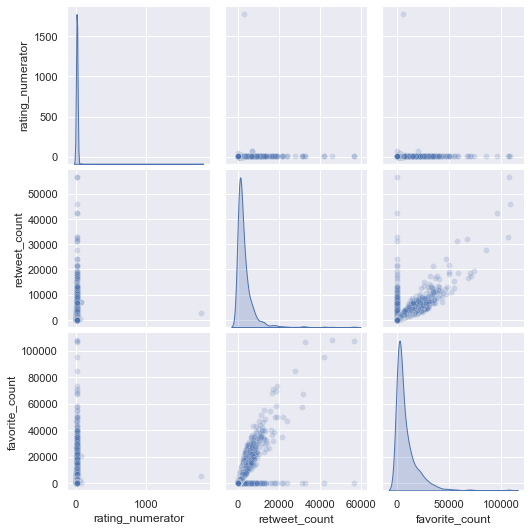

In [103]:
#overview plot
sns.pairplot(df_archive, 
            vars = ['rating_numerator', 'retweet_count', 'favorite_count'], 
             diag_kind = 'kde', plot_kws = {'alpha': 0.2});

## Insight .1  Top dog stages with the highest fav counts

In [104]:
fav_counts_dog_stages = df_archive[df_archive.dog_stages != 'unclassified']
fav_counts_dog_stages = fav_counts_dog_stages.groupby(['dog_stages'])
fav_counts_dog_stages = fav_counts_dog_stages['favorite_count'].sum()
fav_counts_dog_stages = fav_counts_dog_stages.sort_values(ascending = False)
top_dog_stages_fav_counts = fav_counts_dog_stages.head(3)
top_dog_stages_fav_counts

dog_stages
pupper    936001.0
doggo     737573.0
puppo     210339.0
Name: favorite_count, dtype: float64

#### Dogs in the pupper stages had the highest fav count followed by doggo.

## Insight.2  Relationship between favourite and retweet counts .

##### Calculate Mean And Standard deviation  for both fav count and retweet count

In [105]:
print('mean: {}, standard deviation: {}'.format(np.mean(df_archive.favorite_count), np.std(df_archive.favorite_count)))

mean: 8664.055813953488, standard deviation: 11425.143699709524


In [106]:
print('mean: {}, standard deviation: {}'.format(np.mean(df_archive.retweet_count), np.std(df_archive.retweet_count)))

mean: 3170.9986710963453, standard deviation: 4629.705174485312


### Visualization

C:\Users\Remi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


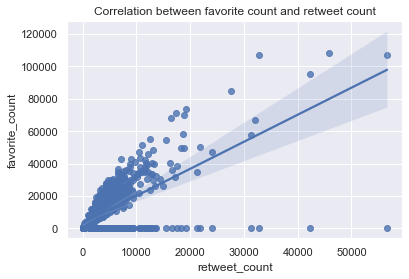

In [107]:
sns.regplot(df_archive.retweet_count, df_archive.favorite_count);
plt.title('Correlation between favorite count and retweet count');

#### The scatter plot shows that there is no correlation bettwen the fav count and retweet count. Which is logical to some extent. I liking a pictures doesn;t automtaiclly mean i will retweet it. Most times, people like and scroll pass the tweet or image.

In [108]:
#calculate correlation coeffcients: 
np.corrcoef(df_archive.retweet_count, df_archive.favorite_count)[0,1]

nan

## Insight.3  The source with the highest count

### Visualization

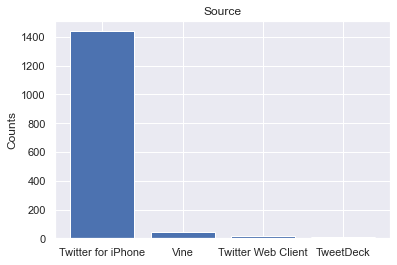

In [109]:
#plotting a bar chart for the source and dog stages variables
counts = [df_archive.query('source == "Twitter for iPhone"').count()[0], df_archive.query('source == "Vine"').count()[0],
          df_archive.query('source == "Twitter Web Client"').count()[0], df_archive.query('source == "TweetDeck"').count()[0]]
ind = np.arange(1, 5)
fig, ax = plt.subplots();
plt.bar(ind, counts);
ax.set_xticks(ind);
ax.set_xticklabels(new_sources_list);
ax.set_ylabel('Counts');
ax.set_title('Source');

##### Twitter Iphone had the highest source count for the tweets

## Insight.4 Favourite counts over time 

In [110]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_convert 

### Visualization

C:\Users\Remi\AppData\Local\Temp\ipykernel_12008\299222239.py:10: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(df_archive['favorite_count'].min() - 10,


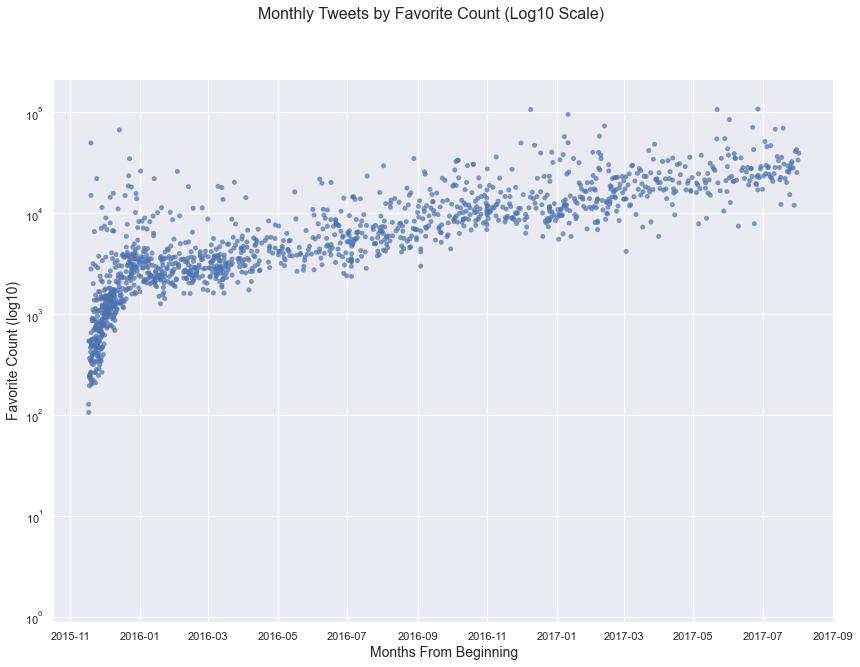

In [114]:
# Adapted from an answer from: 
# https://stackoverflow.com/questions/25741214/how-to-use-colormaps-to-color-plots-of-pandas-dataframes
#https://matplotlib.org/stable/api/cm_api.html
# -------------------------------------------------------------------------

cmap = cm.get_cmap('Spectral_r') # Colour map 
plt.figure(figsize = (14, 10))

plt.yscale('log')
plt.ylim(df_archive['favorite_count'].min() - 10, 
         df_archive['favorite_count'].max() + 107956)
markers = 25


plt.scatter(df_archive.timestamp, df_archive['favorite_count'], 
             s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.7)

# title and labels
plt.suptitle('Monthly Tweets by Favorite Count (Log10 Scale)', fontsize = 16)
plt.xlabel('Months From Beginning', fontsize = 14)
plt.ylabel('Favorite Count (log10)', fontsize = 14)

plt.show();


The slope of the line is increasing at a steady rate from around 2015-11, reflecting the montly increase in tweets being favourited. This clearly shows that the twitter account followers were active, and possibly growing, during the timeframe represented in the archive.
